# Aula 07 - EDA com pandas (II)

## Afinal, o que é uma análise exploratória de dados?

Em uma **Análise Exploratória de Dados** (EDA, *Exploratory Data Analysis*), o objetivo é, como o nome indica, justamente **explorar os dados**. É uma etapa fundamental de todo projeto em Ciência de Dados, pois compreende desde o completo entendimento do problema em questão, ao delineamento de objetivos do projeto e abordagens para buscar padrões iniciais e extração de insights nos dados disponíveis.

Embora uma EDA seja um problema bastante aberto, ela costuma ter algumas etapas essenciais, sumarizadas no diagrama abaixo.

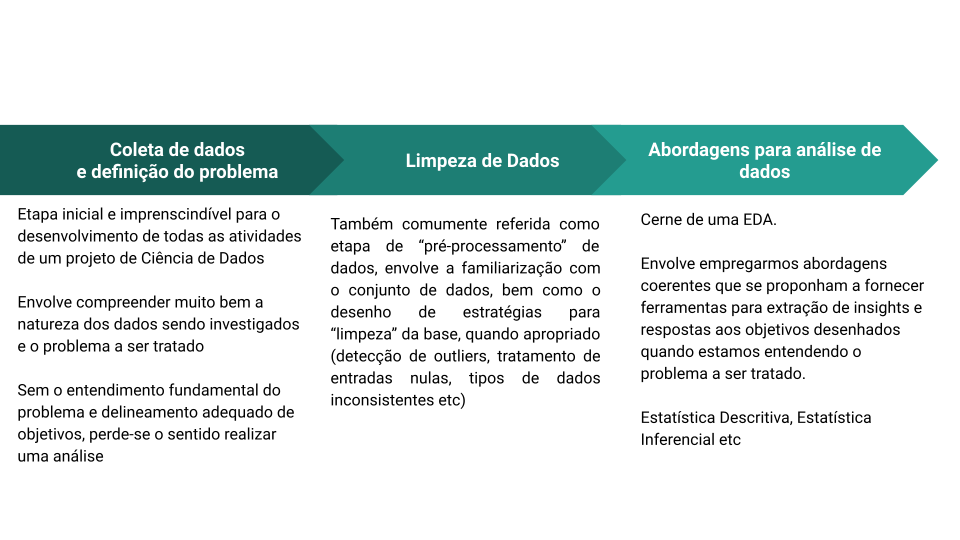

____

## Vamos supor o seguinte case:

Vamos supor que estejamos trabalhando em uma empresa especializada na distribuição e vendas de vinhos tintos. Na óptica da empresa, seria interessante que os vinhos que cheguem aos consumidores sejam percebidos pelo público como bebidas de boa qualidade. Com isto em mente, a empresa realizou uma pesquisa com algumas pessoas voluntárias, catalogando a percepção da qualidade do vinho em uma escala de 0 a 10, e as diferentes características físico-químicas de cada tipo de vinho que poderia ser produzido. As seguintes características foram sistematizadas nesta pesquisa:

- 1 - fixed acidity - medida da acidez devido à presença de ácidos orgânicos de baixa volatilidade (ácido málico, lático, tartárico ou cítrico) no vinho;
- 2 - volatile acidity - medida da acidez devido a ácidos de baixo peso molecular (sobretudo ácido acético) presentes no vinho, que são responsáveis pelo aroma e gosto de vinagre;
- 3 - citric acid - medida de ácido cítrico no vinho;
- 4 - residual sugar - medida de açúcar residual presente no vinho, com origem nos resíduos de açúcar da uva que permanecem no vinho após o fim da fermentação;
- 5 - chlorides - medida de cloretos (íons de cloro) no vinho;
- 6 - free sulfur dioxide - medida de dióxido de enxofre livre (isto é, que não está ligado a outras moléculas) no vinho;
- 7 - total sulfur dioxide - medida de dióxido de enxofre total (livre + porção ligada a outras moléculas) no vinho;
- 8 - density - medida da densidade do vinho;
- 9 - pH - medida do pH do vinho;
- 10 - sulphates - medida de sulfatos (íons SO₄²⁻) no vinho;
- 11 - alcohol - medida da graduação alcoólica do vinho.

Como já mencionamos, a estas características, as pessoas voluntárias associaram uma nota em uma escala de 0 a 10 (que é tida como uma nova coluna na nossa base de dados a ser explorada):

- 12 - quality - score numérico de qualidade (de 0 a 10), produzido com base em dados sensoriais.


A partir da base de dados coletada na pesquisa, nosso objetivo, enquanto Cientistas de Dados, é explorar o dataset para fornecer conclusões que ajudem a impulsionar o negócio da empresa.

**Observação:**
- O contexto deste "case" foi simulado apenas para fins didáticos. A base de dados, e a descrição de seu propósito original, pode ser consultada [aqui](https://archive.ics.uci.edu/ml/datasets/wine+quality).

______

## Começando nossa EDA

Como comentamos anteriormente, os passos inicias de nossa análise envolvem **ingerir os dados** e **formular o problema sobre o qual vamos trabalhar**.

### Que tipos de perguntas seria interessante que tentássemos responder em nossa EDA?

- Correlações das notas com algumas características do dataset
- Como definimos o que é um vinho "bom"?
- Se tivéssemos que enfocar apenas uma característica de interesse, qual seria?

**Atenção:**
- Vale lembrar que uma EDA é um **problema de escopo aberto** e, portanto, uma variedade de abordagens são possíveis, não sendo, assim, as perguntas acima, os únicos caminhos existentes de análise.

### Vamos ler os dados

In [1]:
import numpy as npp
import pandas as pd

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Quais tipos de dados temos na nossa base?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.shape

(1599, 12)

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Quantas entradas temos na base?

In [8]:
df.shape

(1599, 12)

Vemos assim, que temos as 11 caracterísitcas físico-químicas que mencionamos acima, e mais uma coluna, indicando a nota associada à qualidade daquele vinho. Além disso, temos 1599 observações no nosso conjunto de dados.

Será que temos entradas nulas?

In [9]:
df.isnull() # retorna booleano

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum() # total de entrada nulas por coluna

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Ou seja, **não temos valores nulos na nossa base de dados**. (E se tivéssemos?)

___

## Como podemos sumarizar informações das colunas em nossa base de dados?

Observe que, em nossa base de dados, temos **medições repetidas de várias características** sendo associadas a diferentes notas pelas pessoas voluntárias participantes da pesquisa. Como podemos melhor visualizar como estão **distribuídos** estes valores? Vamos recordar?

### Histogramas

Para começarmos a explorar os dados, podemos avaliar as distribuições de algumas das nossas variáveis.

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

[**Histogramas com seaborn**](https://seaborn.pydata.org/generated/seaborn.histplot.html)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

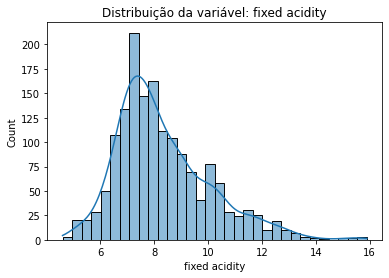

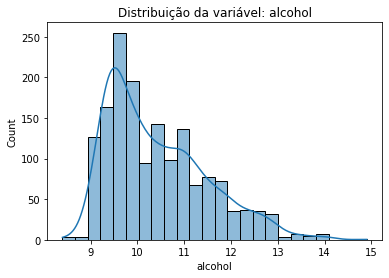

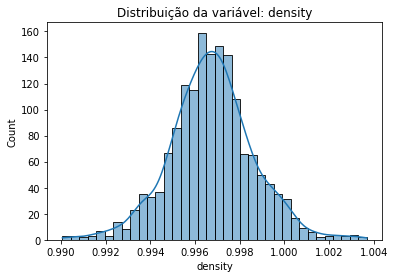

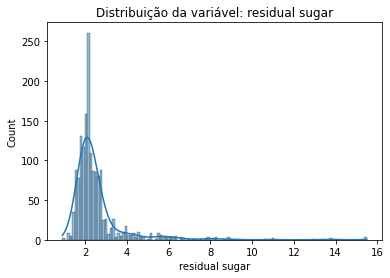

In [43]:
features = ["fixed acidity", "alcohol", "density", "residual sugar"]

for feature in features:
    sns.histplot(data = df,
                x = feature,
                kde = True).set_title(f"Distribuição da variável: {feature}")
    plt.show()

Text(0.5, 1.0, 'Distribuição da variável: residual sugar')

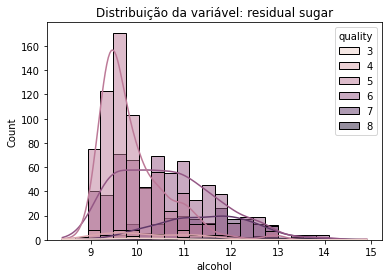

In [14]:
sns.histplot(data = df,
                x = "alcohol",
                kde = True,
            hue = "quality").set_title(f"Distribuição da variável: {feature}")

Poderá ser interessante, por exemplo, verificar como são as distribuições de variáveis que definem o que são vinhos tidos como "bons" versus aqueles tidos como "ruins" pelos consumidores. Como poderíamos fazer isso?

Vamos retomar os histogramas mais adiante; por agora, vamos pensar um pouco a respeito dos outliers.
___

### Outliers

Até o momento, já trabalhamos com algumas metodologias de distribuição de outliers. Vamos avaliá-las no nosso dataset?

**Método da distância inter-quartil**

In [18]:
def get_outliers(df):
    col_outliers_indices = {}
    
    for col in df.drop(columns = "quality"):
        q1 = np.quantile(df[col], 0.25) # primeiro quartil
        q3 = np.quantile(df[col], 0.75) # terceiro quartil
        
        iqr = q3 - q1
        
        col_outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)] # outliers
        col_outliers_indices[col] = col_outliers.index.to_list() # índices dos outliers
    return col_outliers_indices

In [19]:
col_outliers = get_outliers(df)

In [20]:
col_outliers

{'fixed acidity': [205,
  206,
  243,
  244,
  264,
  294,
  328,
  338,
  339,
  347,
  353,
  359,
  363,
  364,
  366,
  374,
  381,
  391,
  394,
  409,
  429,
  440,
  442,
  446,
  470,
  472,
  509,
  510,
  516,
  538,
  544,
  548,
  554,
  555,
  557,
  559,
  560,
  564,
  565,
  596,
  599,
  601,
  603,
  611,
  652,
  680,
  811,
  814,
  1224],
 'volatile acidity': [38,
  94,
  120,
  126,
  127,
  134,
  199,
  553,
  672,
  690,
  700,
  705,
  710,
  724,
  899,
  1261,
  1299,
  1312,
  1467],
 'citric acid': [151],
 'residual sugar': [9,
  11,
  14,
  15,
  18,
  33,
  35,
  39,
  40,
  55,
  57,
  64,
  65,
  154,
  155,
  156,
  157,
  163,
  164,
  192,
  215,
  269,
  270,
  271,
  272,
  274,
  275,
  277,
  278,
  279,
  283,
  324,
  325,
  327,
  353,
  364,
  366,
  374,
  375,
  378,
  395,
  396,
  400,
  408,
  409,
  413,
  415,
  442,
  455,
  480,
  484,
  494,
  501,
  502,
  510,
  515,
  516,
  538,
  539,
  541,
  554,
  555,
  556,
  557,
  558,


Vamos plotar a quantidade de outliers, para melhor visualizar os resultados

In [22]:
col_outliers.keys()

dict_keys(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

In [23]:
n_outliers = {} # para guardar a quantidade de outliers por coluna

for feature in col_outliers.keys():
    outliers_indices = col_outliers[feature]
    n_outliers[feature] = len(outliers_indices)

In [24]:
n_outliers

{'fixed acidity': 49,
 'volatile acidity': 19,
 'citric acid': 1,
 'residual sugar': 155,
 'chlorides': 112,
 'free sulfur dioxide': 30,
 'total sulfur dioxide': 55,
 'density': 45,
 'pH': 35,
 'sulphates': 59,
 'alcohol': 13}

In [30]:
# Podemos usar os índices para verificar os valores que são outliers
df.iloc[col_outliers["fixed acidity"], 0:4]

,fixed acidity,volatile acidity,citric acid,residual sugar
205,12.8,0.300,0.74,2.6
206,12.8,0.300,0.74,2.6
243,15.0,0.210,0.44,2.2
244,15.0,0.210,0.44,2.2
264,12.5,0.560,0.49,2.4
294,13.3,0.340,0.52,3.2
328,13.4,0.270,0.62,2.6
338,12.4,0.490,0.58,3.0
339,12.5,0.280,0.54,2.3
347,13.8,0.490,0.67,3.0


In [32]:
outliers_df = pd.DataFrame(n_outliers, index = [0])

In [35]:
outliers_df.transpose()

,0
fixed acidity,49
volatile acidity,19
citric acid,1
residual sugar,155
chlorides,112
free sulfur dioxide,30
total sulfur dioxide,55
density,45
pH,35
sulphates,59


<AxesSubplot: title={'center': 'Número de outliers em cada coluna'}>

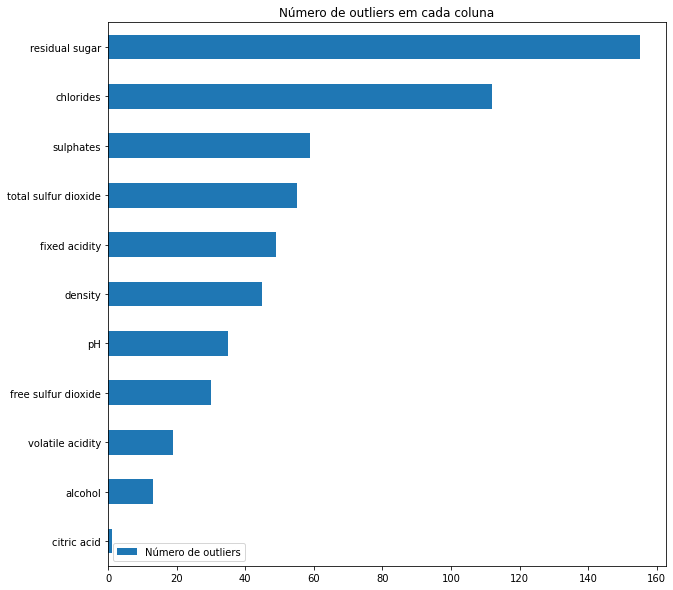

In [41]:
outliers_df\
    .transpose()\
    .rename(columns = {0: "Número de outliers"})\
    .sort_values(by = "Número de outliers")\
    .plot(kind = 'barh', figsize = (10,10), title = "Número de outliers em cada coluna")

**Método do z-score**

<img src="https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png" width=500>

<img src="https://miro.medium.com/max/24000/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width=500>

Vamos fazer a transformação de z-score para cada coluna, e definir que temos outlires quando z > 3 ou z < -3.

In [44]:
def calc_z_score(df):
    return (df - df.mean())/df.std()

In [45]:
df_z = calc_z_score(df)
df_z.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576


In [48]:
((df_z["fixed acidity"] < -3) | (df_z["fixed acidity"] > 3)).sum()

12

Há necessidade de removermos os outliers?

No geral, não necessariamente precisamos remover os outliers. Se formos eventualmente trabalhar com regressores ou modelos que sejam bastante sensíveis a outliers, talvez sua remoção seja, sim, interessante. No entanto, no nosso caso, se não temos uma boa justificativa para removê-los, não necessariamente precisamos fazê-lo. Podem simplesmente ser flutuações inerentes do tipo de dado.

___

## Como relacionamos isso tudo à qualidade do vinho?

Vamos, primeiramente, estudar mais a fundo a coluna "quality".

In [49]:
df["quality"].head(10)

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

Algumas perguntas que podemos nos fazer a respeito da variável associada à percepção de qualidade do vinho incluem:
- esta variável é contínua ou discreta?
- como é a distribuição das notas?
- será que faria sentido "discretizar" a variável em apenas dois níveis categóricos? (ex: "bom" e "ruim")

<AxesSubplot: ylabel='Frequency'>

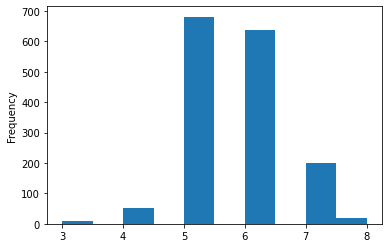

In [50]:
df["quality"].plot(kind = 'hist')

In [51]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Vemos que a maior parte das notas estão concentradas entre 5 e 6.

In [52]:
df["quality"].value_counts(normalize = True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

### Vamos relacionar esta variável às outras?

Sendo assim, poderíamos nos perguntar: **para cada nota, quais tendem a ser os valores de cada característica?**

**Intervalos de confiança**

Já mencionamos que temos uma série de medidas para as mesmas características. Podemos estimar um valor médio e uma medida de **incerteza** desta média, conhecida como **intervalo de confiança**. Assim, conseguimos ter uma ideia de dispersão dos valores e do grau de certeza com o qual conseguimos afirmar que o valor médio da nossa distribuição de valores de cada característica se encontra em um determinado intervalo.

<img src="https://static.significados.com.br/foto/intervaloconfiancaok.jpg" width = 400 />

Vamos avaliar, então, a média de cada característica, e o respectivo intervalo de confiança, para cada nota do conjunto de dados.

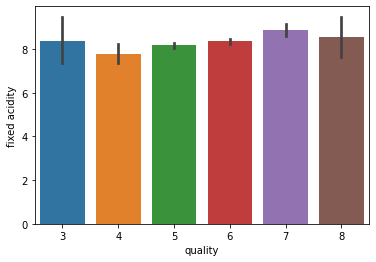

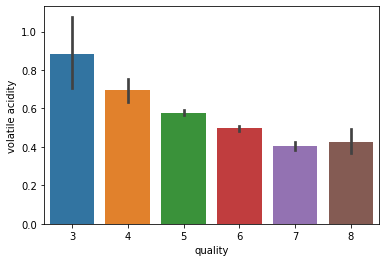

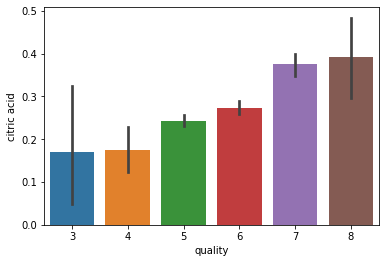

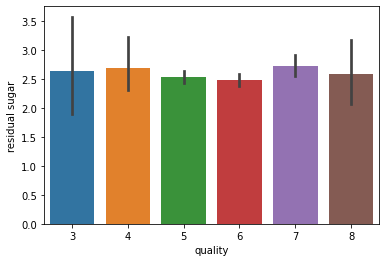

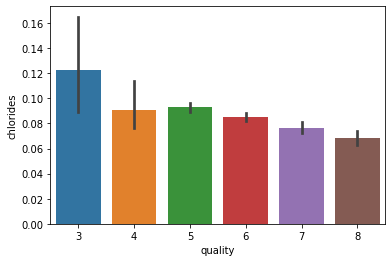

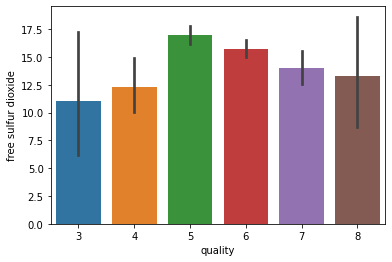

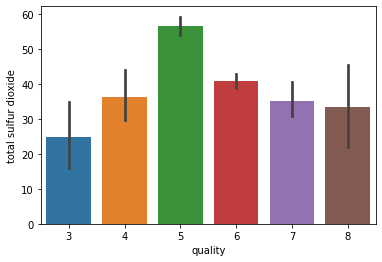

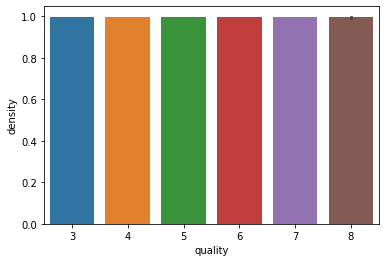

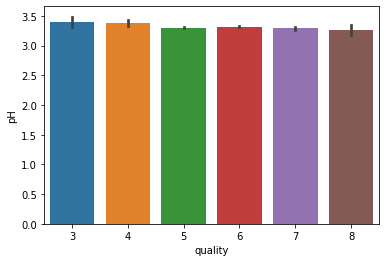

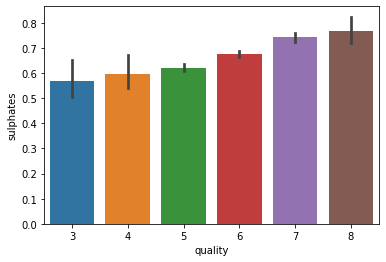

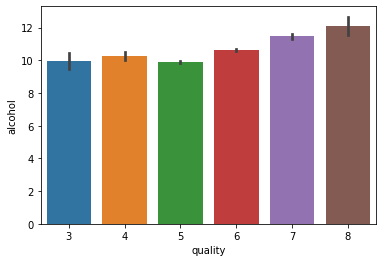

In [53]:
for col in df.drop(columns = "quality"):
    sns.barplot(data = df,
               x = "quality",
               y = col)
    plt.show()

Conseguimos reforçar, com essas visualizações, os mesmos pontos levantados nos gráficos de correlação.

Até aqui, já conseguimos identificar as características que mais **tendem** a influenciar na avaliação da qualidade do vinho. E se quisermos simplificar um pouco o problema, definindo uma nota mínima que entendemos ser suficiente para caracterizar o vinho como "bom", e, então, concluir acerca das características que mais impactam nesse sentido? Será que teremos os mesmos resultados?

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

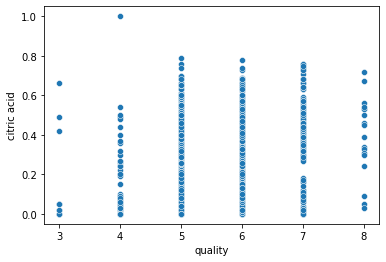

In [56]:
sns.scatterplot(data = df,
               x = "quality",
               y = "citric acid")

**Covariância e correlação**

Até aqui, estudamos algumas medidas de tendência central e dispersão, como média, moda, mediana, desvio-padrão e variância. Nesta aula, começamos a aprofundar e entender como utilizar estas medidas para inferir **relações entre duas variáveis**.

**Covariância**
Medida estatística que mensura a **variabilidade conjunta** de duas variáveis aleatórias. Intuitivamente, podemos pensar na covariância como a tendência de valores superiores de uma variável estarem, também, associados a valores maiores da outra; e vice-versa.

*Definição matemática da covariância*
$cov(X,Y) = \sum_{i=1}^{n} \frac{(x_{i} - \mu_{x})(y_{i} - \mu_{y})}{n-1}$

<img src="https://dpbnri2zg3lc2.cloudfront.net/en/wp-content/uploads/2021/05/positive_negative_weak_covariance.jpg" alt="Alternative text" />

**Correlação**
Medida estatística de dependência entre duas variáveis. Pode ser vista sob alguns tipos de metodologias.

É muito comum encontrar a ideia de correlação associada à *correlação de Pearson*, que expressa a **dependência linear** entre duas variáveis a partir de suas **covariâncias**.

Cálculo da correlação de Pearson:

$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}$.

<img src="https://www.scribbr.de/wp-content/uploads/2021/08/01-correlation-types-1024x415.png" alt="Alternative text" />

A correlação de Pearson **normaliza** as covariâncias no intervalo [-1,1].

Vale ressaltar que *existem outras métricas de correlação*. A correlação de Spearman, por exemplo, pode capturar relações de monotonia **não-lineares** entre duas variáveis.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Spearman_fig1.svg/1200px-Spearman_fig1.svg.png" width = 400 />

Vale lembrar que [correlação não implica causa!](https://tylervigen.com/spurious-correlations)

Podemos computar diretamente a correlação entre todas as colunas do nosso dataframe diretamente com o pandas.

In [57]:
df.corr() # por padrão, faz correlação de Pearson

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [58]:
df.corr(method = 'spearman')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576,0.114084
volatile acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932,-0.380647
citric acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456,0.213481
residual sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548,0.032048
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504,-0.189922
free sulfur dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367,-0.056901
total sulfur dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806,-0.196735
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445,-0.177074
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932,-0.043672
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330,0.377060


Podemos, ainda, deixar o resultado em uma forma um pouco mais "apresentável" utilizando uma visualização gráfica, também com **seaborn**, por exemplo.

<AxesSubplot: >

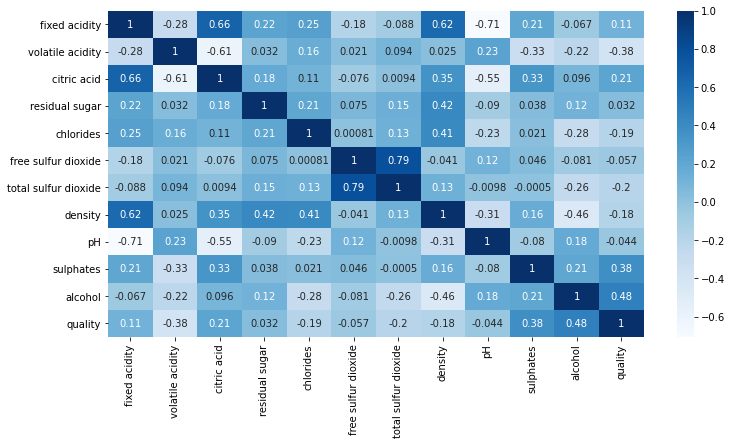

In [62]:
R = df.corr(method = 'spearman')

plt.figure(figsize = (12,6))
sns.heatmap(R,
           annot = True,
           cmap = 'Blues')

<AxesSubplot: >

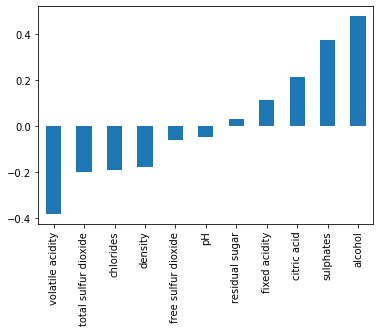

In [66]:
R["quality"].drop("quality").sort_values().plot(kind = 'bar')

Vemos que algumas variáveis estão mais correlacionadas entre si, por exemplo, "density" e "fixed acidity", do que outras. Podemos, ainda, enfocar especificamente as correlações com nossa coluna "quality".

Algumas tendências que poderíamos retirar a partir desse gráfico são:

- No geral, vinhos com maiores teores de álcool **tendem** a ter notas maiores
- Quanto maior a "volatilidade ácida", menores **tendem** a ser as notas (correlação negativa)
- Algumas características, como açúcar residual, parecem influenciar pouco na percepção da qualidade do vinho pelos consumidores

**Simplificando nosso problema para apenas dois níveis de qualidade: "bom" e "ruim"**

<AxesSubplot: ylabel='Frequency'>

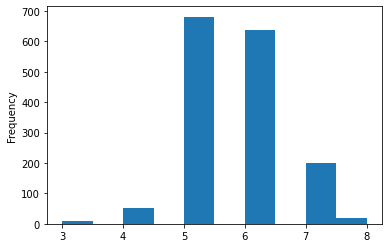

In [67]:
df["quality"].plot(kind = 'hist')

In [68]:
df["quality"].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Que critérios podemos adotar para o nosso ponto de corte para definirmos um bom vinho?

Distribuição de classes para corte = 3


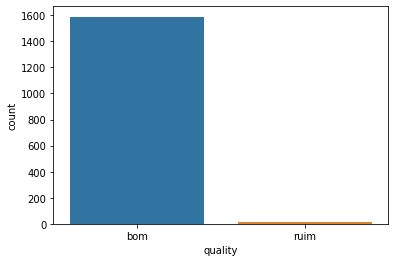

Distribuição de classes para corte = 4


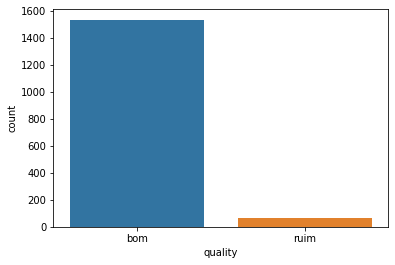

Distribuição de classes para corte = 5


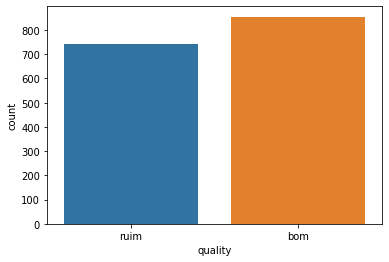

Distribuição de classes para corte = 6


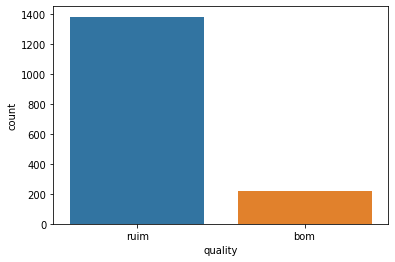

Distribuição de classes para corte = 7


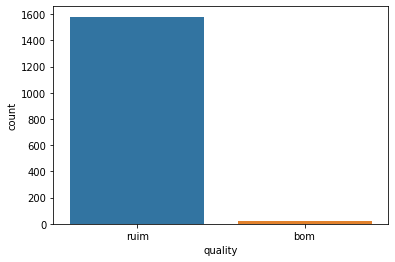

Distribuição de classes para corte = 8


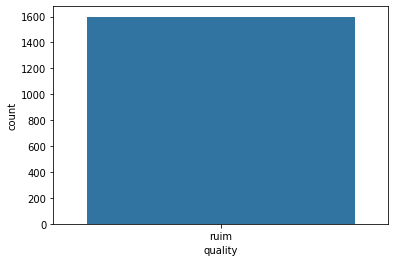

In [70]:
notas_possiveis = df["quality"].sort_values().unique()

for corte in notas_possiveis:
    print(f"Distribuição de classes para corte = {corte}")
    
    aux = df["quality"].apply(lambda x: "bom" if x > corte else "ruim")
    
    sns.countplot(x = aux)
    plt.show()

Vemos que, definindo um corte = 5, temos a situação em que as duas classes de dados (bom e ruim) estão mais equiparadas entre si. Adotemos, pois, o limiar de 5 para essa definição.

In [71]:
df["quality_v2"] = df["quality"].apply(lambda x: "bom" if x > 5 else "ruim")

In [72]:
df[["quality", "quality_v2"]]

,quality,quality_v2
0,5,ruim
1,5,ruim
2,5,ruim
3,6,bom
4,5,ruim
...,...,...
1594,5,ruim
1595,6,bom
1596,6,bom
1597,5,ruim


In [73]:
df["quality_v2"].value_counts(normalize = True)

bom     0.534709
ruim    0.465291
Name: quality_v2, dtype: float64

Com o **pairplot**, conseguimos visualizar as distribuições de cada variável do nosso conjunto de dados, e as relações, par a par, das características da base, além de segmentá-las de acordo com a qualidade do vinho ("bom" vs "ruim").

Será que conseguimos mapear as características com maior potencial para distinguir entre vinhos rotulados como "bons", e aqueles considerados "ruins" segundo nosso critério previamente definido?

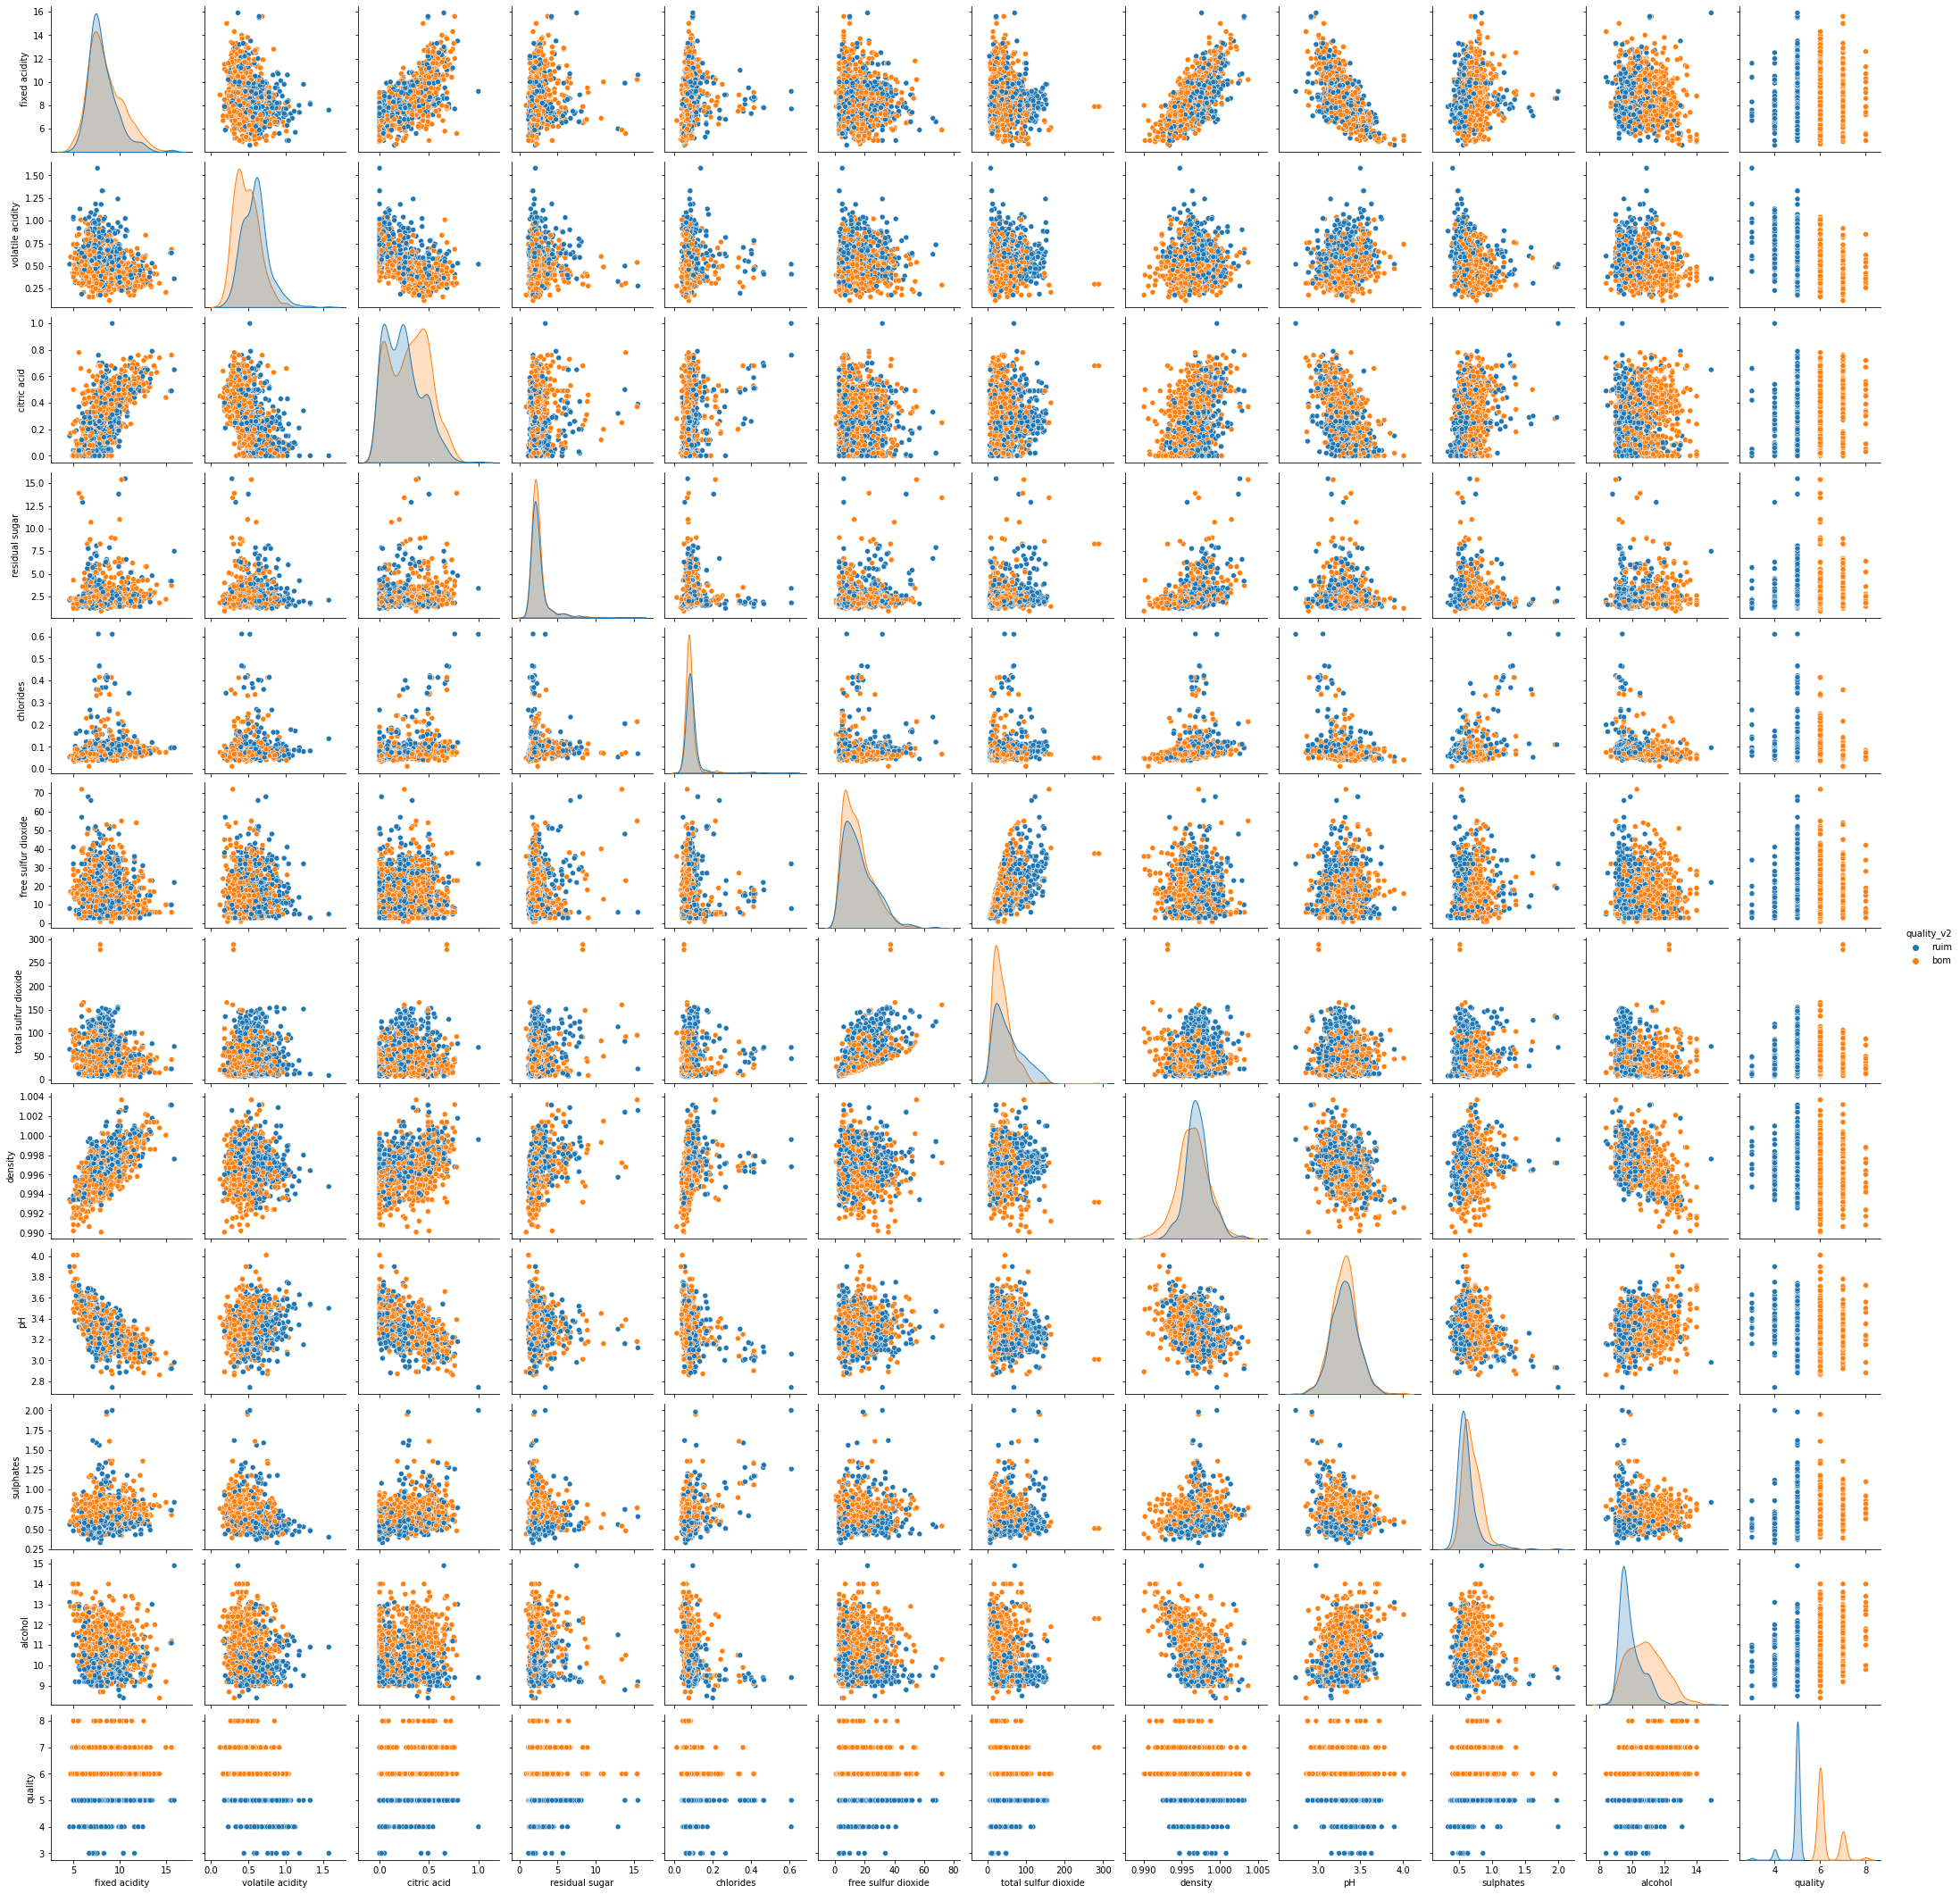

In [74]:
sns.pairplot(df, hue = "quality_v2")

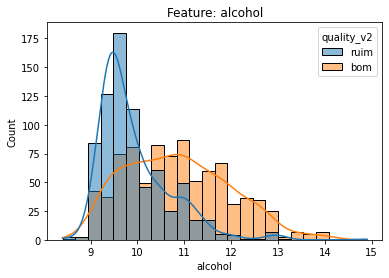

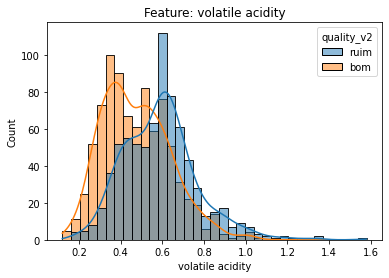

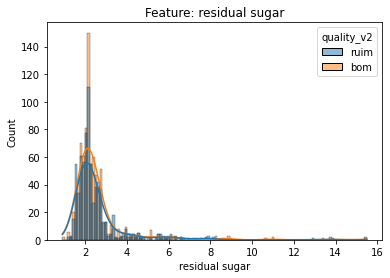

In [76]:
features = ["alcohol", "volatile acidity", "residual sugar"]
for feature in features:
    sns.histplot(data = df,
                x = feature,
                kde = True,
                hue = "quality_v2").set_title(f"Feature: {feature}")
    plt.show()

___

## Conclusões gerais da nossa EDA

### Principais resultados gerais

Quando avaliamos correlações significantes ao nível de 5 %, observamos que:
- o teor alcoólico é a variável mais correlacionada positivamente às notas dos consumidores;
- a acidez volátil é a variável mais correlacionada negativamente (inversamente proporcional) às notas dos consumidores;
- variáveis como açúcar residual e pH parecem ter pouca influência nas notas.

O score de Fisher apontou que, de fato, o teor alcoólico é a variável com maior poder de discriminação entre bons vinhos e vinhos ruins (pensando nas distribuições estatísticas dos dados).

### Que sugestões podemos dar à empresa para produzir vinhos de boa qualidade?

Como principais destaques, podemos sugerir o monitoramento preciso do teor alcoólico dos vinhos, já que é a variável que mais impacta a percepção da qualidade da bebida pelos consumidores, bem como da acidez volátil.